In [1]:
from __future__ import division, print_function, unicode_literals
# Common imports
import numpy as np
import os

# agar outputnya selalu sama setiap dilakukan run kernel
np.random.seed(42)

# agar tidak mengeluarkan warning
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "tugas_akhir3"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)



In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#load the data
dt = pd.read_csv('data lengkap kai untuk ta.csv')
#dataset_test = pd.read_csv('el4233-2018-2019-02-01-test.csv')
#data lengkap kai untuk ta.csv
#Keterlambatan seluruh kereta - Dari KAI - 12 Kereta.csv

In [3]:
dt.head()

,# No,Tanggal,Penyebab,Akibat,Lokasi_1,Lokasi_2,Andil,Bulan Ke,Hari Ke,Nama Hari,Minggu Ke,Andil2,Andil3,No Kereta,Andil Absolut
0,1,2/2/2019 00:00,ANTRIAN TIKET,LAMBAT DI STASIUN AWAL,Purwakarta,Purwakarta,25,2,2,5,5,25,25,396,25
1,2,2/2/2019 00:00,TAKTIS MASINIS,MENGURANGI KELAMBATAN,Sukatani,Plered,-5,2,2,5,5,20,25,396,5
2,3,2/2/2019 00:00,TAKTIS MASINIS,MENGURANGI KELAMBATAN,Cisomang,Cikadongdong,-4,2,2,5,5,16,20,396,4
3,4,2/2/2019 00:00,TAKTIS PPKA,MENGURANGI KELAMBATAN,Cikadongdong,Cikadongdong,-4,2,2,5,5,12,16,396,4
4,5,2/2/2019 00:00,PEMASANGAN TASPAT (PRASARANA),PEMASANGAN TASPAT,Cikadongdong,Rendeh,1,2,2,5,5,13,12,396,1


In [4]:
z=0
while (z < len(dt)):
    if(dt.Lokasi_1[z] == '-'):
        dt.Lokasi_1[z] = dt.Lokasi_2[z]
    z+=1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [5]:
dt.iloc[98]

# No                                   99
Tanggal                   2/15/2019 00:00
Penyebab           PEMINDAHAN PERSILANGAN
Akibat           LAMBAT DI STASIUN ANTARA
Lokasi_1                         Sukatani
Lokasi_2                         Sukatani
Andil                                   8
Bulan Ke                                2
Hari Ke                                15
Nama Hari                               4
Minggu Ke                               7
Andil2                                  8
Andil3                                  8
No Kereta                             396
Andil Absolut                           8
Name: 98, dtype: object

In [6]:

asd = np.savetxt("cekdata.csv", dt, delimiter=",", fmt="%s", header="Penyebab, Akibat, Lokasi_1,Lokasi_2,Andil,Bulan Ke,Minggu ke,No Kereta,Prediksi")
asd

In [7]:
dt.describe()

,# No,Andil,Bulan Ke,Hari Ke,Nama Hari,Minggu Ke,Andil2,Andil3,No Kereta,Andil Absolut
count,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000
mean,354.000000,2.578501,2.519095,13.200849,3.230552,8.929279,17.506365,15.442716,395.500707,5.571429
std,204.237607,7.948345,0.499989,7.985777,1.989142,2.281364,14.755069,14.688186,0.500353,6.224909
min,1.000000,-25.000000,2.000000,1.000000,0.000000,5.000000,-4.000000,-4.000000,395.000000,1.000000
25%,177.500000,0.000000,2.000000,7.000000,1.000000,7.000000,5.000000,4.000000,395.000000,1.500000
50%,354.000000,2.000000,3.000000,12.000000,4.000000,9.000000,14.000000,10.000000,396.000000,2.000000
75%,530.500000,4.500000,3.000000,20.000000,5.000000,11.000000,27.000000,22.000000,396.000000,8.000000
max,707.000000,41.000000,3.000000,31.000000,6.000000,13.000000,71.000000,71.000000,396.000000,41.000000


In [8]:
df = dt.drop(['Tanggal', 'Hari Ke','# No', 'Andil3', 'Andil2', 'Andil Absolut'], axis=1)
df.head()

,Penyebab,Akibat,Lokasi_1,Lokasi_2,Andil,Bulan Ke,Nama Hari,Minggu Ke,No Kereta
0,ANTRIAN TIKET,LAMBAT DI STASIUN AWAL,Purwakarta,Purwakarta,25,2,5,5,396
1,TAKTIS MASINIS,MENGURANGI KELAMBATAN,Sukatani,Plered,-5,2,5,5,396
2,TAKTIS MASINIS,MENGURANGI KELAMBATAN,Cisomang,Cikadongdong,-4,2,5,5,396
3,TAKTIS PPKA,MENGURANGI KELAMBATAN,Cikadongdong,Cikadongdong,-4,2,5,5,396
4,PEMASANGAN TASPAT (PRASARANA),PEMASANGAN TASPAT,Cikadongdong,Rendeh,1,2,5,5,396


In [9]:
df_c = df.dropna()
df_c.describe()

,Andil,Bulan Ke,Nama Hari,Minggu Ke,No Kereta
count,707.000000,707.000000,707.000000,707.000000,707.000000
mean,2.578501,2.519095,3.230552,8.929279,395.500707
std,7.948345,0.499989,1.989142,2.281364,0.500353
min,-25.000000,2.000000,0.000000,5.000000,395.000000
25%,0.000000,2.000000,1.000000,7.000000,395.000000
50%,2.000000,3.000000,4.000000,9.000000,396.000000
75%,4.500000,3.000000,5.000000,11.000000,396.000000
max,41.000000,3.000000,6.000000,13.000000,396.000000


In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df_c, test_size=0.2, random_state=42)

x_train = train_set.drop('Andil', axis = 1)
y_train = train_set.Andil

x_test = test_set.drop('Andil', axis = 1)
y_test = test_set.Andil

In [11]:
x_train.head()

,Penyebab,Akibat,Lokasi_1,Lokasi_2,Bulan Ke,Nama Hari,Minggu Ke,No Kereta
155,GEOMETRI (JJ),PEMASANGAN TASPAT,Sasaksaat,Cilame,2,0,9,396
210,TAKTIS PPKA,MENGURANGI KELAMBATAN,Gedebage,Gedebage,3,2,10,396
260,PEMASANGAN TASPAT (PRASARANA),PEMASANGAN TASPAT,Andir,Bandung,3,1,11,396
425,PEMASANGAN TASPAT (PRASARANA),PEMASANGAN TASPAT,Cikudapateuh,Bandung,2,1,7,395
594,TAKTIS MASINIS,MENGURANGI KELAMBATAN,Plered,Sukatani,3,4,10,395


In [12]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
column_trans = make_column_transformer(
    (OneHotEncoder(sparse = False,handle_unknown='ignore'), 
     ['Lokasi_1','Lokasi_2', 'No Kereta', 'Minggu Ke', 'Bulan Ke','Penyebab', 'Akibat', 'Nama Hari']),
    remainder='passthrough')

In [13]:
from sklearn.tree import DecisionTreeRegressor
tree_clf = DecisionTreeRegressor(random_state=42)

from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators=30, max_features=8, random_state=42)

from sklearn.model_selection import GridSearchCV
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]
forest_reg2 = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg2, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)

from sklearn.svm import SVR
svm_reg = SVR(kernel="linear")

from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120, random_state=42)

from sklearn.ensemble import VotingRegressor
voting_clf = VotingRegressor(
    estimators=[('fr', forest_reg), ('tr', tree_clf), ('svc', svm_reg), ('gb', gbrt)])

In [14]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(column_trans, forest_reg)
pipe2 = make_pipeline(column_trans, svm_reg)
pipe3 = make_pipeline(column_trans, tree_clf)
pipe4 = make_pipeline(column_trans, grid_search)
pipe5 = make_pipeline(column_trans, voting_clf)
pipe6 = make_pipeline(column_trans, gbrt)

pipe.fit(x_train, y_train)
pipe2.fit(x_train, y_train)
pipe3.fit(x_train, y_train)
pipe4.fit(x_train, y_train)
pipe5.fit(x_train, y_train)
pipe6.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categorical_features=None,
                                                                categories=None,
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='ignore',
                                                                n_values=None,
                                                                sparse=False),
                                                  ['Lokasi_1', 'Lokasi_2',...
               

In [15]:
y_pred = pipe5.predict(x_test)
from sklearn.metrics import mean_squared_error
tree_mse = mean_squared_error(y_test, y_pred)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

4.446564988093637

In [16]:
from sklearn.metrics import mean_absolute_error
y_pred = pipe5.predict(x_test)
lin_mae = mean_absolute_error(y_test, y_pred)
lin_mae

2.1858826683993087

In [17]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(pipe2,x_train,y_train,cv=5)
cv_scores.mean()

0.7030916011159783

In [18]:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 30}

In [19]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=4, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [20]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(pipe3,x_train,y_train,cv=5)
cv_scores.mean()

0.4374422627225374

In [21]:
ohe = OneHotEncoder(sparse=False, categories='auto')

In [22]:
ohe.fit_transform(df_c[['No Kereta']])

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [23]:
corr_matrix = df_c.corr()
corr_matrix["Andil"].sort_values(ascending=False)

Andil        1.000000
Nama Hari    0.004901
No Kereta   -0.013103
Bulan Ke    -0.016862
Minggu Ke   -0.018441
Name: Andil, dtype: float64

In [24]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(pipe,x_train,y_train,cv=5)
cv_scores.mean()

0.7168621738533953

In [25]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(pipe5,x_train,y_train,cv=5)
cv_scores.mean()

0.7088833098170643

In [26]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(pipe6,x_train,y_train,cv=5)
cv_scores.mean()

0.7184242996290441

In [27]:
from scipy import stats
confidence = 0.95
squared_errors = (y_pred - y_test) ** 2
mean = squared_errors.mean()
m = len(squared_errors)

np.sqrt(stats.t.interval(confidence, m - 1,
                         loc=np.mean(squared_errors),
                         scale=stats.sem(squared_errors)))

array([3.15184199, 5.44148623])

In [28]:
confidence2 = 0.99
np.sqrt(stats.t.interval(confidence2, m - 1,
                         loc=np.mean(squared_errors),
                         scale=stats.sem(squared_errors)))

array([2.60346911, 5.72414439])

In [29]:
df.info

<bound method DataFrame.info of                           Penyebab                    Akibat      Lokasi_1  \
0                    ANTRIAN TIKET    LAMBAT DI STASIUN AWAL    Purwakarta   
1                   TAKTIS MASINIS     MENGURANGI KELAMBATAN      Sukatani   
2                   TAKTIS MASINIS     MENGURANGI KELAMBATAN      Cisomang   
3                      TAKTIS PPKA     MENGURANGI KELAMBATAN  Cikadongdong   
4    PEMASANGAN TASPAT (PRASARANA)         PEMASANGAN TASPAT  Cikadongdong   
..                             ...                       ...           ...   
702              TUNGGU PENYUSULAN  LAMBAT DI STASIUN ANTARA    Padalarang   
703                    TAKTIS PPKA     MENGURANGI KELAMBATAN        Cilame   
704  PEMASANGAN TASPAT (PRASARANA)         PEMASANGAN TASPAT        Cilame   
705                 TAKTIS MASINIS     MENGURANGI KELAMBATAN      Cisomang   
706                 TAKTIS MASINIS     MENGURANGI KELAMBATAN       Ciganea   

         Lokasi_2  Andil  Bulan

In [30]:
dt["Penyebab"].value_counts()

PEMASANGAN TASPAT (PRASARANA)                         236
TAKTIS MASINIS                                        107
TUNGGU PERSILANGAN                                     80
TAKTIS PPKA                                            69
PEKERJAAN JEMBATAN                                     67
PENAMBAHAN HSD KERETA PEMBANGKIT DI STASIUN ANTARA     42
GEOMETRI (JJ)                                          35
TUNGGU PENYUSULAN                                      26
PEMINDAHAN PERSILANGAN                                 19
ALAM DAN EKSTERNALITAS                                  7
ANJLOGAN (EKSTERNALITAS)                                4
GARDAN SHAFT                                            4
TUNGGU RANGKAIAN (ALAM DAN EKSTERNALITAS)               3
GANGGUAN PENGEREMAN (KERETA)                            2
TAMBAH/LEPAS LOK TRAKSI GANDA DI STASIUN ANTARA         2
GANGGUAN SINYAL (PERSINYALAN ELEKTRIK)                  2
ANTRIAN TIKET                                           1
GANTI LOK DENG

In [31]:
dt.describe()

,# No,Andil,Bulan Ke,Hari Ke,Nama Hari,Minggu Ke,Andil2,Andil3,No Kereta,Andil Absolut
count,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000
mean,354.000000,2.578501,2.519095,13.200849,3.230552,8.929279,17.506365,15.442716,395.500707,5.571429
std,204.237607,7.948345,0.499989,7.985777,1.989142,2.281364,14.755069,14.688186,0.500353,6.224909
min,1.000000,-25.000000,2.000000,1.000000,0.000000,5.000000,-4.000000,-4.000000,395.000000,1.000000
25%,177.500000,0.000000,2.000000,7.000000,1.000000,7.000000,5.000000,4.000000,395.000000,1.500000
50%,354.000000,2.000000,3.000000,12.000000,4.000000,9.000000,14.000000,10.000000,396.000000,2.000000
75%,530.500000,4.500000,3.000000,20.000000,5.000000,11.000000,27.000000,22.000000,396.000000,8.000000
max,707.000000,41.000000,3.000000,31.000000,6.000000,13.000000,71.000000,71.000000,396.000000,41.000000


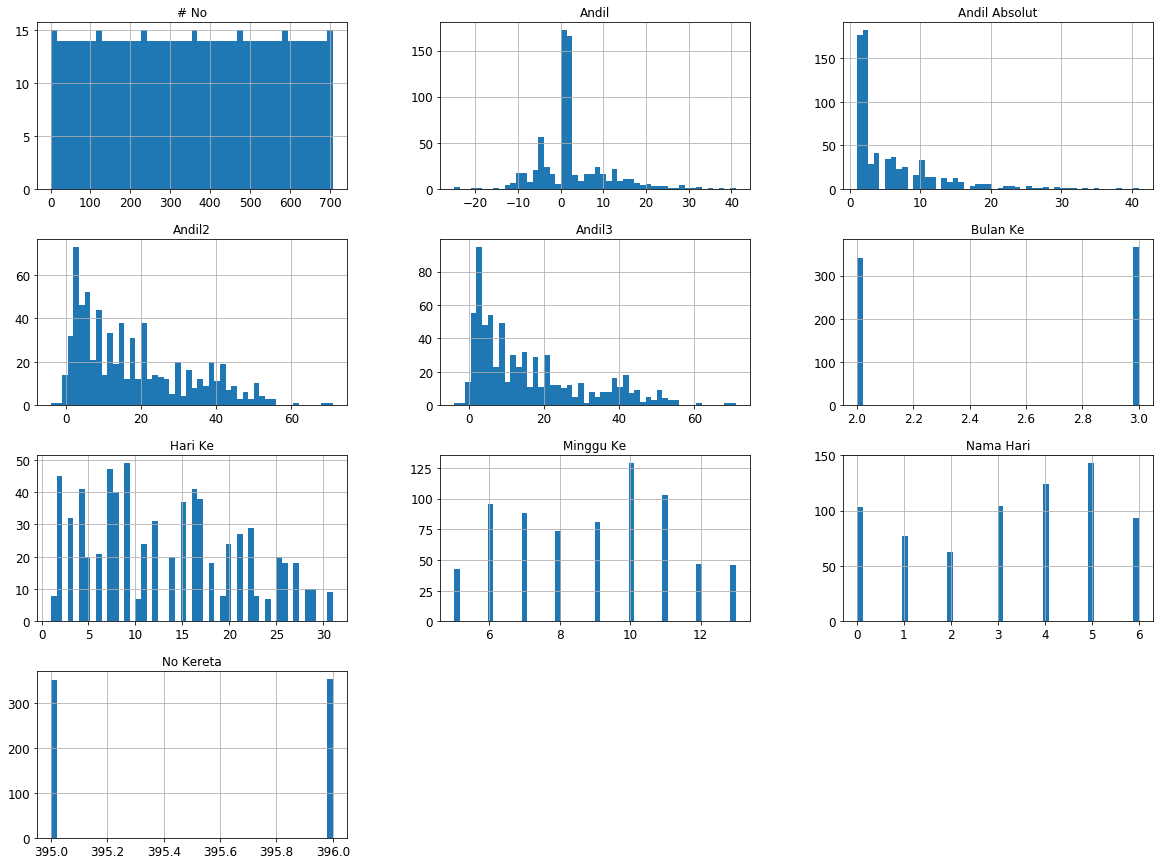

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
dt.hist(bins=50, figsize=(20,15))
plt.show()

In [33]:
abc = test_set
#df = dt.drop(['Tanggal','Andil','Penyebab', 'Hari Ke', 'Nama Hari', '# No', 'Akibat'], axis=1)
abc['Prediksi'] = y_pred
np.savetxt("outpred.csv", abc, delimiter=",", fmt="%s", header="Penyebab, Akibat, Lokasi_1,Lokasi_2,Andil,Bulan Ke,Minggu ke,No Kereta,Prediksi")
abc

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Penyebab,Akibat,Lokasi_1,Lokasi_2,Andil,Bulan Ke,Nama Hari,Minggu Ke,No Kereta,Prediksi
479,TAKTIS MASINIS,MENGURANGI KELAMBATAN,Cisomang,Plered,-4,2,2,8,395,-4.472908
81,GANGGUAN SINYAL (PERSINYALAN ELEKTRIK),LAMBAT DI STASIUN ANTARA,Kiaracondong,Kiaracondong,8,2,1,7,396,15.047833
77,PEKERJAAN JEMBATAN,PEMASANGAN TASPAT,Cimekar,Rancaekek,1,2,0,7,396,1.868499
208,PEMASANGAN TASPAT (PRASARANA),PEMASANGAN TASPAT,Bandung,Cikudapateuh,2,3,2,10,396,1.828814
319,TAKTIS MASINIS,MENGURANGI KELAMBATAN,Lebakjero,Leles,-5,3,3,12,396,-3.905681
...,...,...,...,...,...,...,...,...,...,...
257,TAKTIS MASINIS,MENGURANGI KELAMBATAN,Leles,Karangsari,-6,3,0,11,396,-4.299060
56,PEMASANGAN TASPAT (PRASARANA),PEMASANGAN TASPAT,Andir,Bandung,2,2,4,6,396,1.938135
687,TUNGGU PERSILANGAN,LAMBAT DI STASIUN ANTARA,Karangsari,Karangsari,9,3,3,13,395,11.022129
521,TAKTIS MASINIS,MENGURANGI KELAMBATAN,Ciganea,Purwakarta,-8,2,2,9,395,-5.347364


In [34]:
df_out=pd.read_csv('outpred.csv', sep=',',header=0)
df_out

,# Penyebab,Akibat,Lokasi_1,Lokasi_2,Andil,Bulan Ke,Minggu ke,No Kereta,Prediksi
TAKTIS MASINIS,MENGURANGI KELAMBATAN,Cisomang,Plered,-4,2,2,8,395,-4.472908
GANGGUAN SINYAL (PERSINYALAN ELEKTRIK),LAMBAT DI STASIUN ANTARA,Kiaracondong,Kiaracondong,8,2,1,7,396,15.047833
PEKERJAAN JEMBATAN,PEMASANGAN TASPAT,Cimekar,Rancaekek,1,2,0,7,396,1.868499
PEMASANGAN TASPAT (PRASARANA),PEMASANGAN TASPAT,Bandung,Cikudapateuh,2,3,2,10,396,1.828814
TAKTIS MASINIS,MENGURANGI KELAMBATAN,Lebakjero,Leles,-5,3,3,12,396,-3.905681
...,...,...,...,...,...,...,...,...,...
TAKTIS MASINIS,MENGURANGI KELAMBATAN,Leles,Karangsari,-6,3,0,11,396,-4.299060
PEMASANGAN TASPAT (PRASARANA),PEMASANGAN TASPAT,Andir,Bandung,2,2,4,6,396,1.938135
TUNGGU PERSILANGAN,LAMBAT DI STASIUN ANTARA,Karangsari,Karangsari,9,3,3,13,395,11.022129
TAKTIS MASINIS,MENGURANGI KELAMBATAN,Ciganea,Purwakarta,-8,2,2,9,395,-5.347364


In [35]:
list(df_out.columns) 

['# Penyebab',
 ' Akibat',
 ' Lokasi_1',
 'Lokasi_2',
 'Andil',
 'Bulan Ke',
 'Minggu ke',
 'No Kereta',
 'Prediksi']

In [36]:
#melakukan prediksi terhadap data input baru dengan model yang sudah dibuat 
dt_new = pd.read_csv('data_baru_untuk_diprediksi.csv')
dt_new_drop = dt_new.drop(['Tanggal','Andil2', 'Andil3', 'Hari Ke', '# No', 'Andil Absolut'], axis=1)
dt_new_cleaned = dt_new_drop.dropna()

x_new = dt_new_cleaned.drop('Andil', axis = 1)
y_new = dt_new_cleaned.Andil

y_new_pred = pipe5.predict(x_new)
dt_new_cleaned['Prediksi'] = y_new_pred
dt_new_cleaned

,Penyebab,Akibat,Lokasi_1,Lokasi_2,Andil,Bulan Ke,Nama Hari,Minggu Ke,No Kereta,Prediksi
0,ANTRIAN TIKET,LAMBAT DI STASIUN AWAL,Purwakarta,Purwakarta,25,2,5,5,396,19.674823
1,TAKTIS MASINIS,MENGURANGI KELAMBATAN,Sukatani,Plered,-5,2,5,5,396,-4.510165
2,TAKTIS MASINIS,MENGURANGI KELAMBATAN,Cisomang,Cikadongdong,-4,2,5,5,396,-3.576739
3,TAKTIS PPKA,MENGURANGI KELAMBATAN,Cikadongdong,Cikadongdong,-4,2,5,5,396,-5.465719
4,PEMASANGAN TASPAT (PRASARANA),PEMASANGAN TASPAT,Cikadongdong,Rendeh,1,2,5,5,396,1.158420
5,ANJLOGAN (EKSTERNALITAS),PEMINDAHAN PERSILANGAN,Rendeh,Rendeh,2,2,5,5,396,6.301655


In [37]:
y_new_pred

array([19.67482298, -4.51016517, -3.57673945, -5.46571906,  1.15841962,
        6.30165543])

In [38]:
y_new

0    25
1    -5
2    -4
3    -4
4     1
5     2
Name: Andil, dtype: int64

In [39]:
df_c["Akibat"].value_counts()

PEMASANGAN TASPAT                           336
MENGURANGI KELAMBATAN                       177
LAMBAT DI STASIUN ANTARA                    149
PEMINDAHAN PERSILANGAN                       14
PENGISIAN BAHAN BAKAR                         8
PEMINDAHAN PENYUSULAN                         8
KA TIDAK TERTANJAK                            7
LAMBAT DI STASIUN AWAL                        3
PERSILANGAN/PENYUSULAN DENGAN KA REGULER      3
PERSILANGAN/PENYUSULAN DENGAN KLB             2
Name: Akibat, dtype: int64

In [40]:
df_c["Penyebab"].value_counts()

PEMASANGAN TASPAT (PRASARANA)                         236
TAKTIS MASINIS                                        107
TUNGGU PERSILANGAN                                     80
TAKTIS PPKA                                            69
PEKERJAAN JEMBATAN                                     67
PENAMBAHAN HSD KERETA PEMBANGKIT DI STASIUN ANTARA     42
GEOMETRI (JJ)                                          35
TUNGGU PENYUSULAN                                      26
PEMINDAHAN PERSILANGAN                                 19
ALAM DAN EKSTERNALITAS                                  7
ANJLOGAN (EKSTERNALITAS)                                4
GARDAN SHAFT                                            4
TUNGGU RANGKAIAN (ALAM DAN EKSTERNALITAS)               3
GANGGUAN PENGEREMAN (KERETA)                            2
TAMBAH/LEPAS LOK TRAKSI GANDA DI STASIUN ANTARA         2
GANGGUAN SINYAL (PERSINYALAN ELEKTRIK)                  2
ANTRIAN TIKET                                           1
GANTI LOK DENG

In [41]:
dt_Pe = df_c[df_c.Penyebab=='PEMASANGAN TASPAT (PRASARANA)']
dt_M = df_c[df_c.Penyebab=='TUNGGU PERSILANGAN']
#dt_L = df_c[df_c.Lokasi_2=='Bandung']
dt_P = pd.concat([dt_Pe, dt_M])

In [42]:
dt_P

,Penyebab,Akibat,Lokasi_1,Lokasi_2,Andil,Bulan Ke,Nama Hari,Minggu Ke,No Kereta
4,PEMASANGAN TASPAT (PRASARANA),PEMASANGAN TASPAT,Cikadongdong,Rendeh,1,2,5,5,396
8,PEMASANGAN TASPAT (PRASARANA),PEMASANGAN TASPAT,Andir,Bandung,1,2,5,5,396
10,PEMASANGAN TASPAT (PRASARANA),PEMASANGAN TASPAT,Bandung,Cikudapateuh,2,2,5,5,396
18,PEMASANGAN TASPAT (PRASARANA),PEMASANGAN TASPAT,Rendeh,Maswati,1,2,6,5,396
20,PEMASANGAN TASPAT (PRASARANA),PEMASANGAN TASPAT,Andir,Bandung,2,2,6,5,396
...,...,...,...,...,...,...,...,...,...
685,TUNGGU PERSILANGAN,LAMBAT DI STASIUN ANTARA,Sukatani,Sukatani,9,3,5,12,395
687,TUNGGU PERSILANGAN,LAMBAT DI STASIUN ANTARA,Karangsari,Karangsari,9,3,3,13,395
694,TUNGGU PERSILANGAN,LAMBAT DI STASIUN ANTARA,Rendeh,Rendeh,5,3,3,13,395
695,TUNGGU PERSILANGAN,LAMBAT DI STASIUN ANTARA,Sukatani,Sukatani,12,3,3,13,395


In [43]:
train_set2, test_set2 = train_test_split(dt_P, test_size=0.2, random_state=42)

x_train2 = train_set2.drop('Andil', axis = 1)
y_train2 = train_set2.Andil

x_test2 = test_set2.drop('Andil', axis = 1)
y_test2 = test_set2.Andil

In [44]:
pipe10 = make_pipeline(column_trans, voting_clf)
pipe10.fit(x_train2, y_train2)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categorical_features=None,
                                                                categories=None,
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='ignore',
                                                                n_values=None,
                                                                sparse=False),
                                                  ['Lokasi_1', 'Lokasi_2',...
               

In [45]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(pipe10,x_train2,y_train2,cv=5)
cv_scores.mean()

0.5580085849611112

In [46]:
y_pred2 = pipe10.predict(x_test2)
from sklearn.metrics import mean_squared_error
tree_mse2 = mean_squared_error(y_test2, y_pred2)
tree_rmse2 = np.sqrt(tree_mse2)
tree_rmse2

2.3748699577895276

In [47]:
tree_mse2

5.640007316411232

In [48]:
np.savetxt("y_pred2.csv", y_pred2, delimiter=",", fmt="%s")
y_pred2

array([ 1.88145756,  1.01046871,  1.08655551,  1.89810386,  1.08937006,
        8.0255884 ,  1.90181184,  1.21457594,  1.79521043,  1.73694213,
        1.67265859,  1.08802228,  0.95149479,  1.91045847,  1.01295617,
        2.76757184,  1.78130024,  1.48676754,  1.69015843,  1.15497852,
        1.79868487,  2.36165804,  1.73167099,  9.2528805 , 10.41681855,
        3.64123969,  1.91094054,  8.77367607,  0.9571506 ,  9.31511907,
        6.15190786,  3.65223024,  1.84566558, 11.10685329,  6.86397354,
       11.26989342,  1.76816364,  1.05886806,  8.45483937,  1.92998209,
        1.20472163,  1.81934582,  0.97107423,  1.03202502,  1.67092417,
        1.0874914 ,  1.26657117,  1.16257071,  6.6164207 ,  1.87798771,
        1.0767124 ,  1.00609727,  0.92655983,  1.76166765,  1.89587214,
        1.72011294,  9.58557434,  1.99294384,  8.20807996,  1.73342365,
       11.19231605,  1.07004618,  1.08045151,  1.79194198])

In [49]:
np.savetxt("y_test2.csv", y_test2, delimiter=",", fmt="%s")
y_test2.head()

535    2
114    1
508    1
241    1
281    1
Name: Andil, dtype: int64

In [50]:
y_test2.describe()

count    64.000000
mean      3.093750
std       4.050157
min      -8.000000
25%       1.000000
50%       2.000000
75%       2.000000
max      19.000000
Name: Andil, dtype: float64

In [51]:
y_test2.head()

535    2
114    1
508    1
241    1
281    1
Name: Andil, dtype: int64

In [52]:
from sklearn.metrics import mean_absolute_error

lin_mae2 = mean_absolute_error(y_test2, y_pred2)
lin_mae2

1.1688811767242697

In [53]:
from scipy import stats
confidence = 0.68
squared_errors = (y_pred2 - y_test2) ** 2
mean = squared_errors.mean()
m = len(squared_errors)

np.sqrt(stats.t.interval(confidence, m - 1,
                         loc=np.mean(squared_errors),
                         scale=stats.sem(squared_errors)))

array([1.8013654 , 2.83462473])

In [54]:
confidence = 0.95
squared_errors = (y_pred2 - y_test2) ** 2
mean = squared_errors.mean()
m = len(squared_errors)

np.sqrt(stats.t.interval(confidence, m - 1,
                         loc=np.mean(squared_errors),
                         scale=stats.sem(squared_errors)))

array([0.93011459, 3.22721265])